In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading the data
spam_data = pd.read_csv('spam_data_with_index.csv')

In [3]:
spam_data

,index,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,"spam, non-spam classes"
0,0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4205,4205,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4206,4206,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4207,4207,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4208,4208,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [4]:
# Drop the index column as it's not required for analysis
spam_data.drop('index', axis=1, inplace=True)

In [5]:
# Split the dataset into the feature matrix (X) and the target variable (y)
X = spam_data.drop('spam, non-spam classes', axis=1)
y = spam_data['spam, non-spam classes']

In [6]:
X

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,word_freq_conference:,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4205,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4206,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4207,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4208,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [7]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4205    0
4206    0
4207    0
4208    0
4209    0
Name: spam, non-spam classes, Length: 4210, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Split the dataset into training and testing sets with a 9:1 ratio
#Set the random state equals to 0 because every time I run the code same split is generated.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [10]:
#Centering and Feature Scaling
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [11]:
#Perform PCA
#Retain 95% of information from the datset
pca = PCA(0.95)
X_train_pca = pca.fit_transform(scaled_X_train)
X_test_pca = pca.transform(scaled_X_test)

In [12]:
X_train_pca.shape

(3789, 49)

In [13]:
y_train.shape

(3789,)

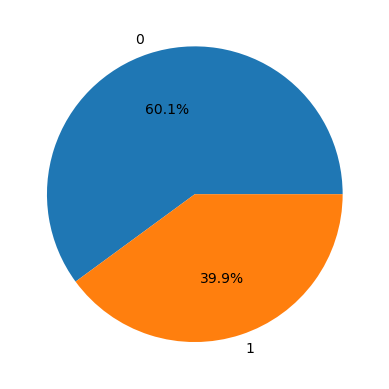

In [14]:
unique_labels, label_counts = np.unique(y_train, return_counts=True)
plt.pie(label_counts, labels=unique_labels, autopct='%1.1f%%')
plt.show()

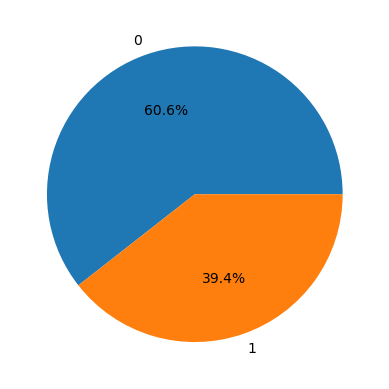

In [15]:
unique_labels, label_counts = np.unique(y_test, return_counts=True)
plt.pie(label_counts, labels=unique_labels, autopct='%1.1f%%')
plt.show()

In [16]:
y_test

3681    0
2230    0
2533    0
195     1
2913    0
       ..
2617    0
1330    1
1009    1
1953    0
2592    0
Name: spam, non-spam classes, Length: 421, dtype: int64

**Scree Plot**

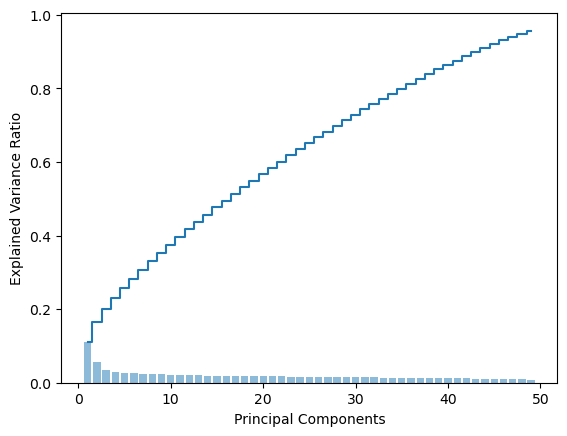

In [17]:
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.show()

**Cumulative Variance Plot**

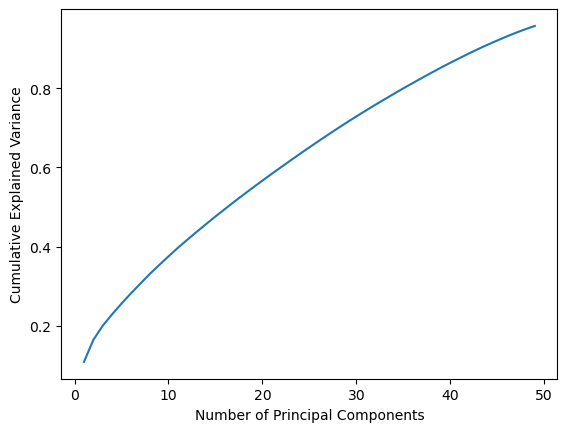

In [18]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

**Scatter Plot**

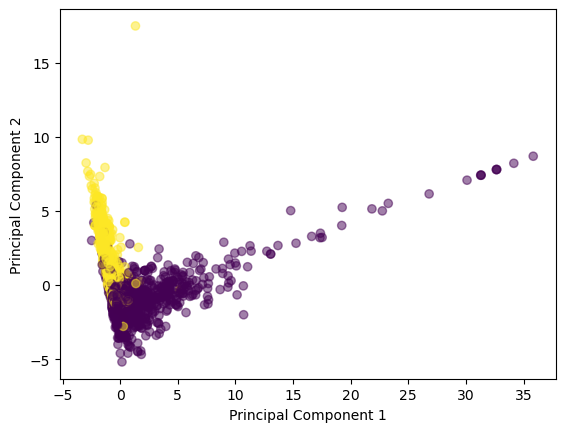

In [19]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Biplot**

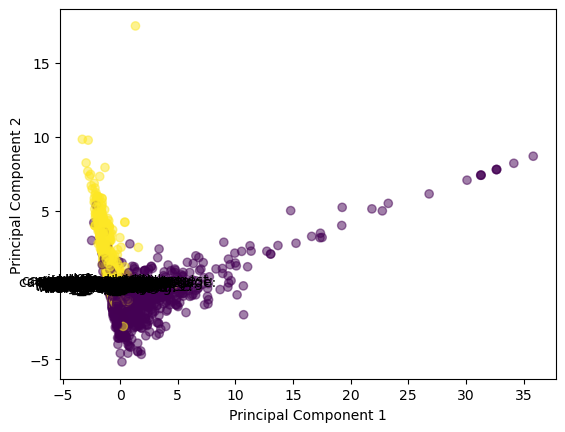

In [20]:
fig, ax = plt.subplots()
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, alpha=0.5)
for i, feature in enumerate(X.columns):
    ax.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], head_width=0.05, head_length=0.05, linewidth=1, color='red')
    ax.text(pca.components_[0, i] * 1.5, pca.components_[1, i] * 1.5, feature, color='black', ha='center', va='center', fontsize=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [21]:
# Get the variance explained by each principal component
print('Explained variance:', pca.explained_variance_ratio_)

Explained variance: [0.10947535 0.05556683 0.0358294  0.02868966 0.0271688  0.02565881
 0.02458213 0.02417705 0.02260543 0.02188607 0.02170827 0.02020813
 0.02009365 0.01945683 0.01930077 0.01865183 0.01856672 0.01796751
 0.01781822 0.01747541 0.01719437 0.01700054 0.01672558 0.01662851
 0.01640093 0.0161104  0.01588092 0.01563824 0.01531056 0.01508866
 0.01457023 0.01441327 0.01402119 0.01393563 0.01380936 0.01330648
 0.0132294  0.01288336 0.01278352 0.01230873 0.01191089 0.01175584
 0.01131623 0.01083869 0.01037527 0.01015452 0.00944801 0.00884303
 0.00827368]


In [22]:
# Get the correlation between the original variables and the principal components
print('Variable correlations:', pca.components_)

Variable correlations: [[-0.04538512 -0.01868628 -0.05068438 ... -0.01789613 -0.03075811
  -0.04623122]
 [ 0.14398611  0.1097933   0.1468342  ...  0.13023693  0.23166375
   0.19883825]
 [-0.03711819 -0.02416386 -0.03325647 ...  0.30285771  0.47256858
   0.39458033]
 ...
 [ 0.05374118 -0.0296187  -0.00212362 ... -0.04351414  0.01592289
   0.1750263 ]
 [ 0.10583953  0.02429296  0.0187917  ... -0.01757694  0.01354211
  -0.04980302]
 [-0.05900867 -0.09269071 -0.00852871 ...  0.05156394 -0.06049641
   0.11748044]]


In [23]:
# Get the quality of the principal component loadings
print('Principal component loadings:', pca.components_.T * np.sqrt(pca.explained_variance_))

Principal component loadings: [[-0.11338782  0.25628497 -0.05305195 ...  0.0394432   0.07515247
  -0.04052846]
 [-0.04668483  0.19542422 -0.03453669 ... -0.02173857  0.01724947
  -0.06366202]
 [-0.1266272   0.26135437 -0.0475325  ... -0.00155862  0.01334324
  -0.0058577 ]
 ...
 [-0.04471077  0.23181242  0.43286568 ... -0.03193708 -0.01248069
   0.03541525]
 [-0.07684445  0.41234491  0.67542846 ...  0.01168656  0.00961571
  -0.04155027]
 [-0.11550168  0.35391786  0.56396213 ...  0.12846008 -0.03536316
   0.08068816]]


In [24]:
# Check the results on a subset of the data
subset_data = scaled_X_train[:50, :]
pca.fit(subset_data)
print('Subset explained variance:', pca.explained_variance_ratio_)

Subset explained variance: [0.34313293 0.2473888  0.05233655 0.05099762 0.03714348 0.03085574
 0.02690971 0.02331445 0.0201511  0.01744038 0.01676162 0.01441545
 0.01220535 0.01125572 0.01028376 0.00969663 0.00847179 0.0077001
 0.00667234 0.00614161]


In [25]:
# Check the results using alternative methods
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=49)
fa.fit(scaled_X_train)
print('Factor analysis explained variance:', np.sum(fa.noise_variance_))

Factor analysis explained variance: 29.972673857620666


import numpy as np
from sklearn.decomposition import PCA

#Load your data into a numpy array
data = np.loadtxt('data.csv', delimiter=',')

#Instantiate a PCA object with the number of principal components you want to extract
pca = PCA(n_components=2)

#Fit the PCA model to your data
pca.fit(data)

#Get the variance explained by each principal component
print('Explained variance:', pca.explained_variance_ratio_)

#Get the correlation between the original variables and the principal components
print('Variable correlations:', pca.components_)

#Get the quality of the principal component loadings
print('Principal component loadings:', pca.components_.T * np.sqrt(pca.explained_variance_))

#Check the results on a subset of the data
subset_data = data[:50, :]
pca.fit(subset_data)
print('Subset explained variance:', pca.explained_variance_ratio_)

#Check the results using alternative methods
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=2)
fa.fit(data)
print('Factor analysis explained variance:', np.sum(fa.noise_variance_))


* Explained variance: A list of two values, representing the proportion of variance explained by each of the two principal components. Ideally, these values should add up to 1, indicating that all the variance in the data has been explained by the principal components.

* Variable correlations: A matrix with two rows and as many columns as the number of variables in your dataset. This matrix represents the correlations between each variable and the two principal components. Ideally, the matrix should show that each variable has a high correlation with one of the principal components and a low correlation with the other.

* Principal component loadings: A matrix with as many rows as the number of variables in your dataset and two columns, representing the weight assigned to each variable in the construction of the two principal components. Ideally, the matrix should show that each variable has a high weight for one of the principal components and a low weight for the other.

* Subset explained variance: A list of two values, representing the proportion of variance explained by each of the two principal components, calculated using a subset of the data. Ideally, these values should be similar to the explained variance calculated using the entire dataset, indicating that the PCA analysis is robust.

* Factor analysis explained variance: A single value representing the amount of variance explained by factor analysis. Ideally, this value should be similar to the variance explained by the PCA analysis, indicating that the results are consistent across different methods. Note that the specific value of this output will depend on the specific parameters used for the factor analysis.





# K-Nearest Neighbor(KNN) Classification Model

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
classifier = KNeighborsClassifier()

**Optimal K value** 

In [28]:
#Grid Search
from sklearn.model_selection import GridSearchCV

#Define the parameter grid for k values to search
param_grid = {'n_neighbors': range(1, 30)}

#Perform grid search using cross-validation
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(X_train_pca,y_train)

# Print the optimal k value and corresponding accuracy score
print("Optimal k value: ", grid_search.best_params_['n_neighbors'])
print("Best accuracy score: ", grid_search.best_score_)

Optimal k value:  5
Best accuracy score:  0.8981275901611345


In [29]:
#Random Search
from sklearn.model_selection import RandomizedSearchCV

#Perform grid search using cross-validation
random_search = RandomizedSearchCV(classifier, param_distributions=param_grid, cv=5, n_iter=10)
random_search.fit(X_train_pca,y_train)

# Print the optimal k value and corresponding accuracy score
print("Optimal k value: ", random_search.best_params_['n_neighbors'])
print("Best accuracy score: ", random_search.best_score_)

Optimal k value:  3
Best accuracy score:  0.8968093745969892


In [30]:
#Random Search
from sklearn.model_selection import RandomizedSearchCV

#Perform grid search using cross-validation
random_search = RandomizedSearchCV(classifier, param_distributions=param_grid, cv=5, n_iter=10)
random_search.fit(X_train_pca,y_train)

# Print the optimal k value and corresponding accuracy score
print("Optimal k value: ", random_search.best_params_['n_neighbors'])
print("Best accuracy score: ", random_search.best_score_)

Optimal k value:  3
Best accuracy score:  0.8968093745969892


**Use 5 as K value without applying PCA**

In [31]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [32]:
classifier.score(X_test,y_test)

0.7980997624703088

**Confusion Matrix**

In [33]:
y_pred = classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[204,  51],
       [ 34, 132]])

Text(58.222222222222214, 0.5, 'Truth')

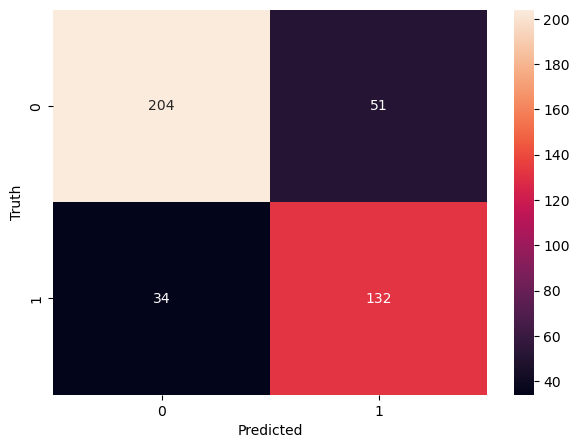

In [34]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Classification Report**

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       255
           1       0.72      0.80      0.76       166

    accuracy                           0.80       421
   macro avg       0.79      0.80      0.79       421
weighted avg       0.80      0.80      0.80       421



**Use 3 as K value without applying PCA**

In [36]:
classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
classifier.score(X_test,y_test)

0.8052256532066508

**Confusion Matrix**

In [38]:
y_pred = classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[209,  46],
       [ 36, 130]])

Text(58.222222222222214, 0.5, 'Truth')

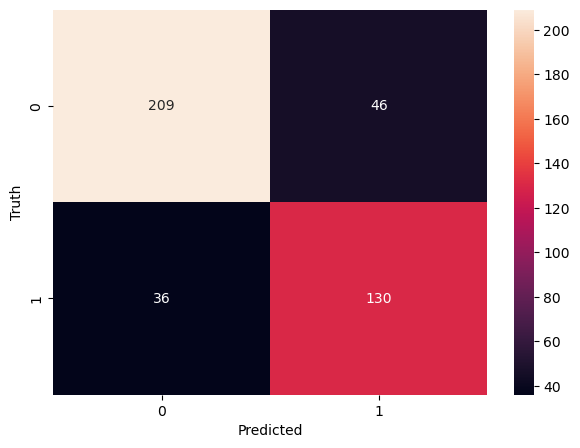

In [39]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Classification Report**

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       255
           1       0.74      0.78      0.76       166

    accuracy                           0.81       421
   macro avg       0.80      0.80      0.80       421
weighted avg       0.81      0.81      0.81       421



**Use 5 as K value after applying PCA**

In [41]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train_pca,y_train)

KNeighborsClassifier()

In [42]:
classifier.score(X_test_pca,y_test)

0.9144893111638955

**Confusion Matrix**

In [43]:
y_pred = classifier.predict(X_test_pca)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[239,  16],
       [ 20, 146]])

Text(58.222222222222214, 0.5, 'Truth')

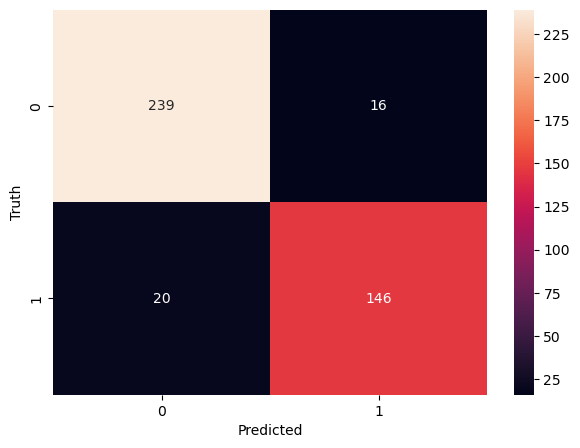

In [44]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Classification Report**

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       255
           1       0.90      0.88      0.89       166

    accuracy                           0.91       421
   macro avg       0.91      0.91      0.91       421
weighted avg       0.91      0.91      0.91       421



**Use 11 as K value after applying PCA**

In [46]:
classifier = KNeighborsClassifier(n_neighbors=11, metric='minkowski', p=2)
classifier.fit(X_train_pca,y_train)

KNeighborsClassifier(n_neighbors=11)

In [47]:
classifier.score(X_test_pca,y_test)

0.9121140142517815

**Confusion Matrix**

In [48]:
y_pred = classifier.predict(X_test_pca)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[241,  14],
       [ 23, 143]])

Text(58.222222222222214, 0.5, 'Truth')

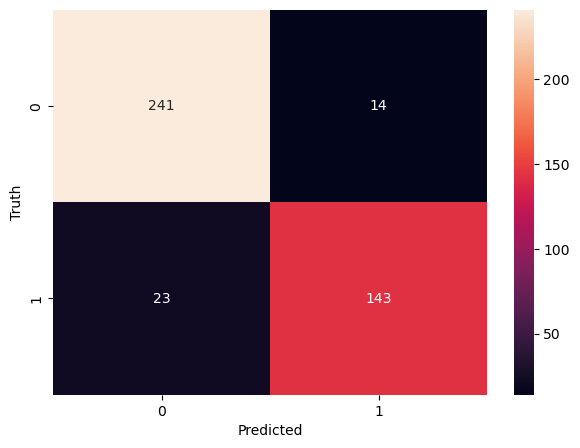

In [49]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Classification Report**

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       255
           1       0.91      0.86      0.89       166

    accuracy                           0.91       421
   macro avg       0.91      0.90      0.91       421
weighted avg       0.91      0.91      0.91       421



**Use 3 as K value after applying PCA**

In [51]:
classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
classifier.fit(X_train_pca,y_train)

KNeighborsClassifier(n_neighbors=3)

In [52]:
classifier.score(X_test_pca,y_test)

0.9097387173396675

**Confusion Matrix**

In [53]:
y_pred = classifier.predict(X_test_pca)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[239,  16],
       [ 22, 144]])

Text(58.222222222222214, 0.5, 'Truth')

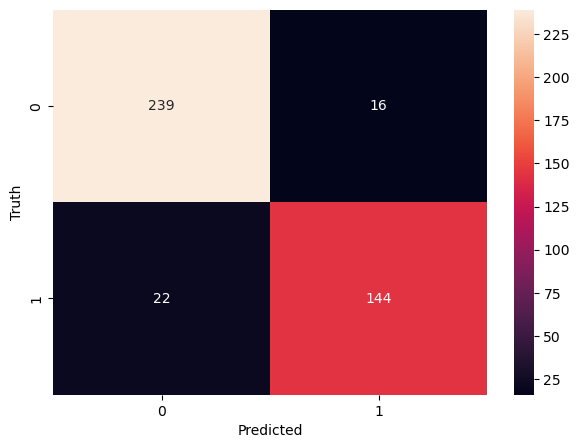

In [54]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Classification Report**

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       255
           1       0.90      0.87      0.88       166

    accuracy                           0.91       421
   macro avg       0.91      0.90      0.90       421
weighted avg       0.91      0.91      0.91       421



# Decision Trees

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
spam_email_tree = DecisionTreeClassifier(random_state=0,criterion='gini')
spam_email_tree

DecisionTreeClassifier(random_state=0)

**Using data without perform PCA**

In [58]:
spam_email_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

# Checking accuracy of testing dataset

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
predTree = spam_email_tree.predict(X_test)

In [61]:
print (predTree [0:5])
print (y_test [0:5])

[1 0 0 1 0]
3681    0
2230    0
2533    0
195     1
2913    0
Name: spam, non-spam classes, dtype: int64


In [62]:
spam_email_tree.score(X_test,y_test)

0.9121140142517815

# Checking accuracy of training dataset

In [63]:
predictions_train = spam_email_tree.predict(X_train)
accuracy_score(y_train,predictions_train)

0.9992082343626286

# Visualizing our final decision tree

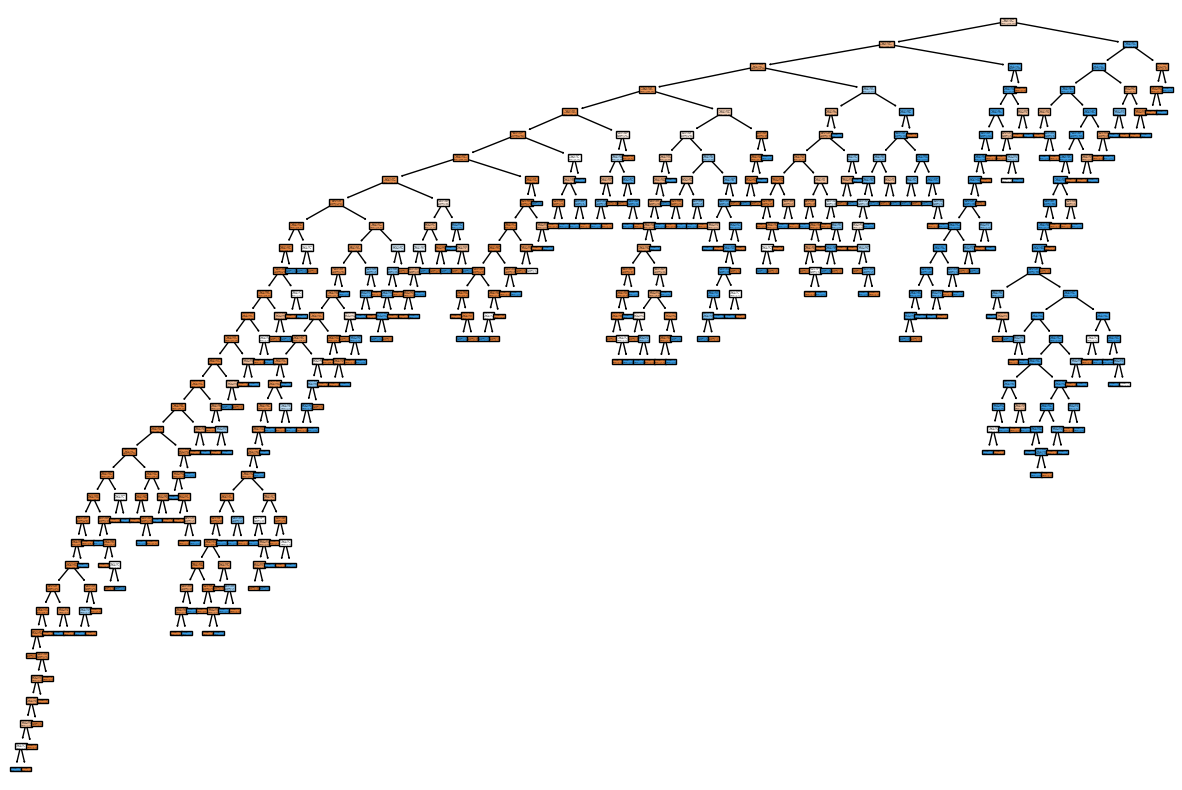

In [64]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(spam_email_tree,filled=True)
plt.show()

# Evaluating our test dataset

**Confusion Matrix**

In [65]:
conf_matrix = confusion_matrix(y_test, predTree)
conf_matrix

array([[234,  21],
       [ 16, 150]])

Text(58.222222222222214, 0.5, 'Truth')

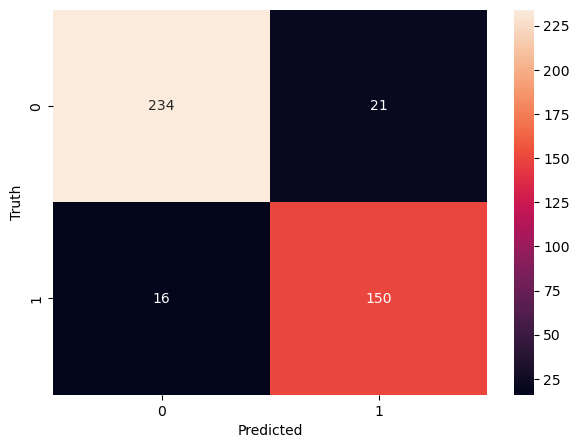

In [66]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Classification Report**

In [67]:
print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       255
           1       0.88      0.90      0.89       166

    accuracy                           0.91       421
   macro avg       0.91      0.91      0.91       421
weighted avg       0.91      0.91      0.91       421



**Using data after perform PCA**

In [68]:
spam_email_tree.fit(X_train_pca,y_train)

DecisionTreeClassifier(random_state=0)

# Checking accuracy of testing dataset

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
predTree = spam_email_tree.predict(X_test_pca)

In [71]:
print (predTree [0:5])
print (y_test [0:5])

[1 0 0 1 0]
3681    0
2230    0
2533    0
195     1
2913    0
Name: spam, non-spam classes, dtype: int64


In [72]:
spam_email_tree.score(X_test_pca,y_test)

0.8764845605700713

# Checking accuracy of training dataset

In [73]:
predictions_train = spam_email_tree.predict(X_train_pca)
accuracy_score(y_train,predictions_train)

0.9992082343626286

# Visualizing our final decision tree

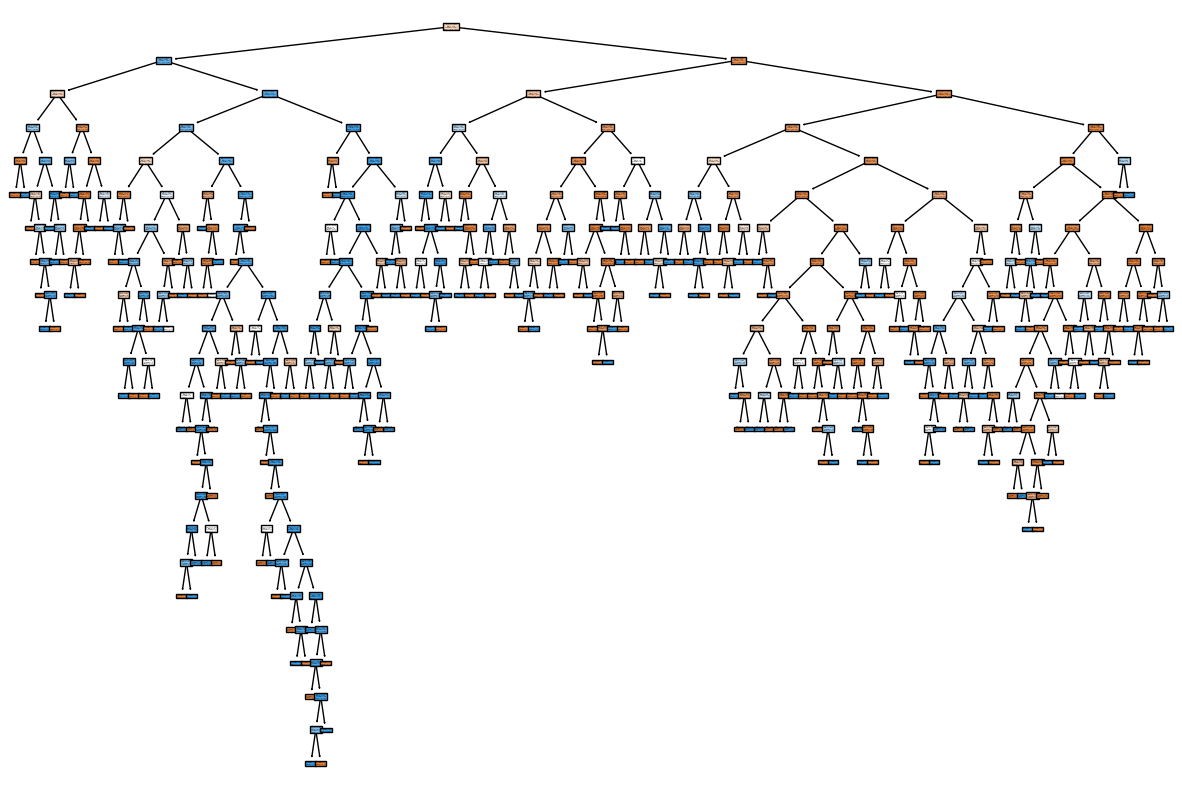

In [74]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(spam_email_tree,filled=True)
plt.show()

# Evaluating our test dataset

**Confusion Matrix**

In [75]:
conf_matrix = confusion_matrix(y_test, predTree)
conf_matrix

array([[229,  26],
       [ 26, 140]])

Text(58.222222222222214, 0.5, 'Truth')

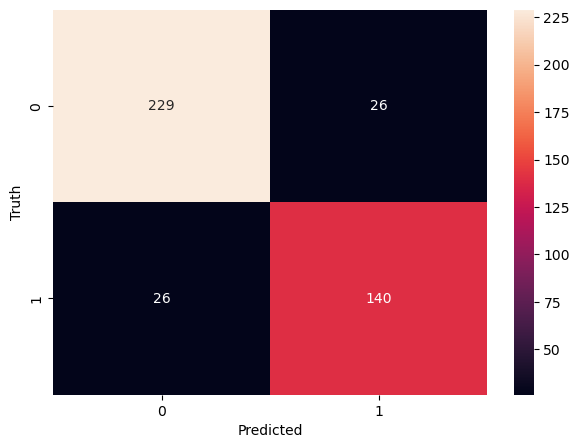

In [76]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Classification Report**

In [77]:
print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       255
           1       0.84      0.84      0.84       166

    accuracy                           0.88       421
   macro avg       0.87      0.87      0.87       421
weighted avg       0.88      0.88      0.88       421

